In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [8]:
df = pd.read_csv("/Users/pasupuletyharshita/Downloads/earthquake-prediction.csv")


In [9]:
df.shape


(23412, 21)

In [10]:
df.head


<bound method NDFrame.head of              Date      Time  Latitude  Longitude        Type   Depth  \
0      01/02/1965  13:44:18   19.2460   145.6160  Earthquake  131.60   
1      01/04/1965  11:29:49    1.8630   127.3520  Earthquake   80.00   
2      01/05/1965  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
3      01/08/1965  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
4      01/09/1965  13:32:50   11.9380   126.4270  Earthquake   15.00   
...           ...       ...       ...        ...         ...     ...   
23407  12/28/2016  08:22:12   38.3917  -118.8941  Earthquake   12.30   
23408  12/28/2016  09:13:47   38.3777  -118.8957  Earthquake    8.80   
23409  12/28/2016  12:38:51   36.9179   140.4262  Earthquake   10.00   
23410  12/29/2016  22:30:19   -9.0283   118.6639  Earthquake   79.00   
23411  12/30/2016  20:08:28   37.3973   141.4103  Earthquake   11.94   

       Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0              NaN          

In [13]:
df.isnull().sum().sort_values(ascending=False)


Magnitude Error               23085
Horizontal Error              22256
Horizontal Distance           21808
Magnitude Seismic Stations    20848
Depth Error                   18951
Depth Seismic Stations        16315
Azimuthal Gap                 16113
Root Mean Square               6060
Magnitude Type                    3
Magnitude Source                  0
Location Source                   0
Source                            0
ID                                0
Date                              0
Time                              0
Magnitude                         0
Depth                             0
Type                              0
Longitude                         0
Latitude                          0
Status                            0
dtype: int64

In [17]:
cols_to_drop = [
    "Magnitude Error",
    "Horizontal Error",
    "Horizontal Distance",
    "Magnitude Seismic Stations",
    "Depth Error",
    "Depth Seismic Stations",
    "Azimuthal Gap",
    "Root Mean Square"
]

df_clean = df.drop(columns=cols_to_drop)


In [18]:
df_clean.shape


(23412, 13)

In [19]:
df_clean.isnull().sum()



Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      3
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [20]:
df_clean = df_clean.dropna()


In [21]:
df_clean.shape


(23409, 13)

In [23]:
df_clean["Datetime"] = pd.to_datetime(df_clean["Date"] + " " + df_clean["Time"], errors="coerce")
df_clean[["Date", "Time", "Datetime"]].head()



,Date,Time,Datetime
0,01/02/1965,13:44:18,1965-01-02 13:44:18
1,01/04/1965,11:29:49,1965-01-04 11:29:49
2,01/05/1965,18:05:58,1965-01-05 18:05:58
3,01/08/1965,18:49:43,1965-01-08 18:49:43
4,01/09/1965,13:32:50,1965-01-09 13:32:50


In [24]:
df_clean["Datetime"].isnull().sum()


3

In [25]:
df_clean = df_clean.dropna(subset=["Datetime"])


In [26]:
df_clean["Datetime"].isnull().sum()


0

In [27]:
df_clean.shape


(23406, 14)

In [28]:
df_clean["Year"] = df_clean["Datetime"].dt.year
df_clean["Month"] = df_clean["Datetime"].dt.month
df_clean["Day"] = df_clean["Datetime"].dt.day
df_clean["Hour"] = df_clean["Datetime"].dt.hour


In [29]:
df_clean[["Datetime", "Year", "Month", "Day", "Hour"]].head()


,Datetime,Year,Month,Day,Hour
0,1965-01-02 13:44:18,1965,1,2,13
1,1965-01-04 11:29:49,1965,1,4,11
2,1965-01-05 18:05:58,1965,1,5,18
3,1965-01-08 18:49:43,1965,1,8,18
4,1965-01-09 13:32:50,1965,1,9,13


In [30]:
df_clean = df_clean.drop(columns=["Date", "Time"])


In [31]:
df_clean.columns


Index(['Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude', 'Magnitude Type',
       'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status',
       'Datetime', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [32]:
df_clean.head()
#lets see the cleaned dataset

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status,Datetime,Year,Month,Day,Hour
0,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02 13:44:18,1965,1,2,13
1,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04 11:29:49,1965,1,4,11
2,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05 18:05:58,1965,1,5,18
3,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08 18:49:43,1965,1,8,18
4,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09 13:32:50,1965,1,9,13


In [33]:
df_clean.tail()

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status,Datetime,Year,Month,Day,Hour
23407,38.3917,-118.8941,Earthquake,12.30,5.6,ML,NN00570710,NN,NN,NN,Reviewed,2016-12-28 08:22:12,2016,12,28,8
23408,38.3777,-118.8957,Earthquake,8.80,5.5,ML,NN00570744,NN,NN,NN,Reviewed,2016-12-28 09:13:47,2016,12,28,9
23409,36.9179,140.4262,Earthquake,10.00,5.9,MWW,US10007NAF,US,US,US,Reviewed,2016-12-28 12:38:51,2016,12,28,12
23410,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,US10007NL0,US,US,US,Reviewed,2016-12-29 22:30:19,2016,12,29,22
23411,37.3973,141.4103,Earthquake,11.94,5.5,MB,US10007NTD,US,US,US,Reviewed,2016-12-30 20:08:28,2016,12,30,20


In [34]:
df_clean.columns
#all col names

Index(['Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude', 'Magnitude Type',
       'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status',
       'Datetime', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [36]:
df_clean
#Table view

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status,Datetime,Year,Month,Day,Hour
0,19.2460,145.6160,Earthquake,131.60,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02 13:44:18,1965,1,2,13
1,1.8630,127.3520,Earthquake,80.00,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04 11:29:49,1965,1,4,11
2,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05 18:05:58,1965,1,5,18
3,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08 18:49:43,1965,1,8,18
4,11.9380,126.4270,Earthquake,15.00,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09 13:32:50,1965,1,9,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,38.3917,-118.8941,Earthquake,12.30,5.6,ML,NN00570710,NN,NN,NN,Reviewed,2016-12-28 08:22:12,2016,12,28,8
23408,38.3777,-118.8957,Earthquake,8.80,5.5,ML,NN00570744,NN,NN,NN,Reviewed,2016-12-28 09:13:47,2016,12,28,9
23409,36.9179,140.4262,Earthquake,10.00,5.9,MWW,US10007NAF,US,US,US,Reviewed,2016-12-28 12:38:51,2016,12,28,12
23410,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,US10007NL0,US,US,US,Reviewed,2016-12-29 22:30:19,2016,12,29,22


In [37]:
df_clean.to_csv("earthquake_cleaned.csv", index=False)
#save the cleaned dataset

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


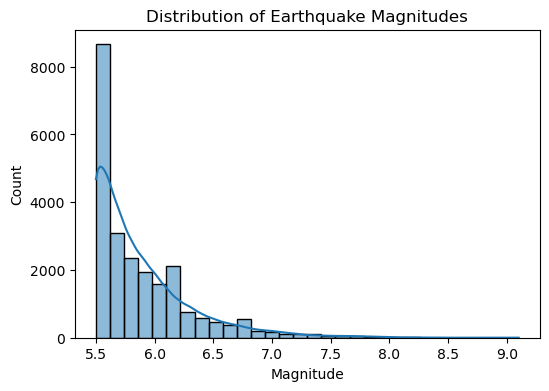

In [38]:
plt.figure(figsize=(6,4))
sns.histplot(df_clean["Magnitude"], bins=30, kde=True)
plt.title("Distribution of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.show()
#Distribution of earthquake magnitudes

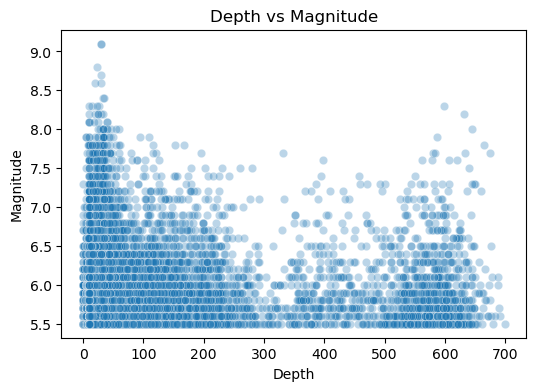

In [52]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df_clean["Depth"],
    y=df_clean["Magnitude"],
    alpha=0.3
)
plt.title("Depth vs Magnitude")
plt.xlabel("Depth")
plt.ylabel("Magnitude")
plt.show()

#EXPLANATION
#But the scatter plot shows:
#No clear straight-line pattern
#Many clusters and variations
#WE CONCLUDE- Linear Regression is limited for this problem

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict + Evaluate
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mse, rmse
#RMSE was used because it measures the average prediction error in the same unit as earthquake magnitude and penalizes large prediction mistakes.

(0.18316193148828053, 0.4279742182518481)

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


In [54]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [56]:
rf_pred = rf_model.predict(X_test)


In [57]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)

rf_rmse


0.4291491116053882

In [58]:
print("Linear Regression RMSE:", rmse)
print("Random Forest RMSE:", rf_rmse)


Linear Regression RMSE: 0.4279742182518481
Random Forest RMSE: 0.4291491116053882


In [59]:
#Feature Importance
import pandas as pd

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance


Longitude    0.203214
Latitude     0.201361
Depth        0.155981
Year         0.124444
Day          0.116984
Hour         0.116730
Month        0.081286
dtype: float64

<Axes: title={'center': 'Feature Importance (Random Forest)'}>

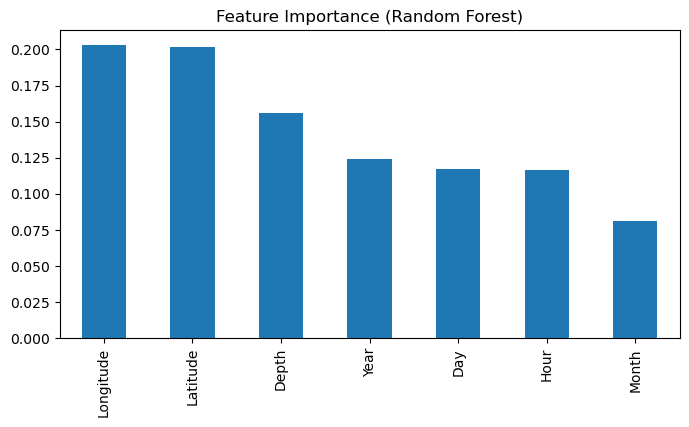

In [60]:
feature_importance.plot(kind="bar", figsize=(8,4), title="Feature Importance (Random Forest)")


In [ ]:
#Key takeaway “The Random Forest model identified spatial features (latitude, longitude, and depth) as the most influential predictors of earthquake magnitude, while temporal features such as month and hour contributed relatively less.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


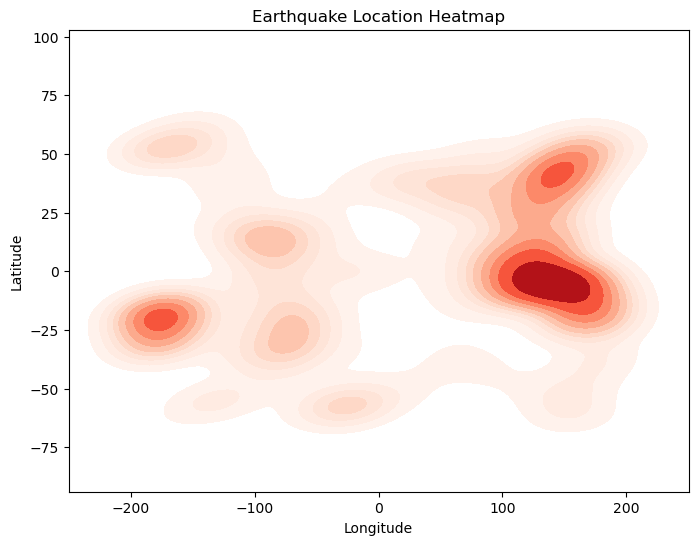

In [61]:
plt.figure(figsize=(8,6))

sns.kdeplot(
    x=df_clean["Longitude"],
    y=df_clean["Latitude"],
    cmap="Reds",
    fill=True,
    thresh=0.05
)

plt.title("Earthquake Location Heatmap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


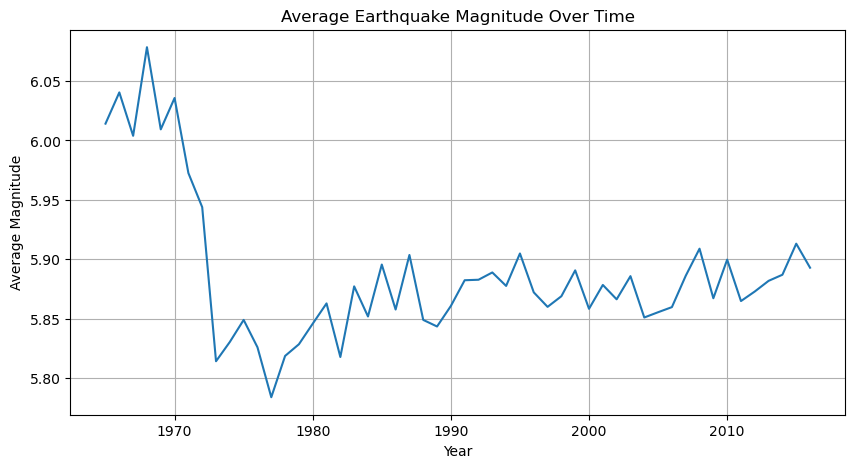

In [62]:
yearly_mag = df_clean.groupby("Year")["Magnitude"].mean()

plt.figure(figsize=(10,5))
yearly_mag.plot()

plt.title("Average Earthquake Magnitude Over Time")
plt.xlabel("Year")
plt.ylabel("Average Magnitude")
plt.grid(True)
plt.show()


In [ ]:
#“After building predictive models, I used spatial and temporal visualizations to validate feature importance. The heatmap confirmed that geographic location strongly influences earthquake magnitude, while the time-series analysis helped identify long-term magnitude trends.”

In [ ]:
#n this project, we analyzed global earthquake data to understand patterns in magnitude, depth, location, and time, and built machine learning models to predict earthquake magnitude.